In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/cleaned_ids2018_sampled.csv")

In [ ]:
df=df.reset_index()
df['Label']

0          1
1          1
2          1
3          1
4          1
          ..
1252841    1
1252842    1
1252843    1
1252844    1
1252845    1
Name: Label, Length: 1252846, dtype: int64

In [ ]:
df1=df.loc[df['Label'] == 1]
df1=df1.head(250000)
df4=df.loc[df['Label'] == 4]
df4=df4.head(250000)
df5=df.loc[df['Label'] == 5]
df5=df5.head(100000)
df2=df.loc[df['Label'] == 2]
df3=df.loc[df['Label'] == 3]
df6=df.loc[df['Label'] == 6]
df7=df.loc[df['Label'] == 7]
df8=df.loc[df['Label'] == 8]
df9=df.loc[df['Label'] == 9]
df10=df.loc[df['Label'] == 10]
df11=df.loc[df['Label'] == 11]

In [ ]:
merge = [
    df1, 
    df2,
    df3,
    df4,
    df5,
    df6, 
    df7
]
df = pd.concat(merge)
del merge
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531329 entries, 0 to 1252199
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              531329 non-null  int64  
 1   Unnamed: 0         531329 non-null  int64  
 2   Dst Port           531329 non-null  int64  
 3   Protocol           531329 non-null  int64  
 4   Flow Duration      531329 non-null  int64  
 5   Tot Fwd Pkts       531329 non-null  int64  
 6   Tot Bwd Pkts       531329 non-null  int64  
 7   TotLen Fwd Pkts    531329 non-null  int64  
 8   TotLen Bwd Pkts    531329 non-null  int64  
 9   Fwd Pkt Len Max    531329 non-null  int64  
 10  Fwd Pkt Len Min    531329 non-null  int64  
 11  Fwd Pkt Len Mean   531329 non-null  float64
 12  Fwd Pkt Len Std    531329 non-null  float64
 13  Bwd Pkt Len Max    531329 non-null  int64  
 14  Bwd Pkt Len Min    531329 non-null  int64  
 15  Bwd Pkt Len Mean   531329 non-null  float64
 16  B

In [ ]:
df=df.reset_index()

In [ ]:
import numpy as np
dfnew=df
# dfnew['Label'] = np.where(dfnew['Label'] > 1, 0, dfnew['Label'])
dfnew['Label'].nunique()

7

In [ ]:

dfnew['Label']=(dfnew['Label']+1)%2
data = dfnew.drop(['index','Unnamed: 0'], axis=1)
data['Label']

0         0
1         0
2         0
3         0
4         0
         ..
531324    0
531325    0
531326    0
531327    0
531328    0
Name: Label, Length: 531329, dtype: int64

Text(0, 0.5, 'PC2')

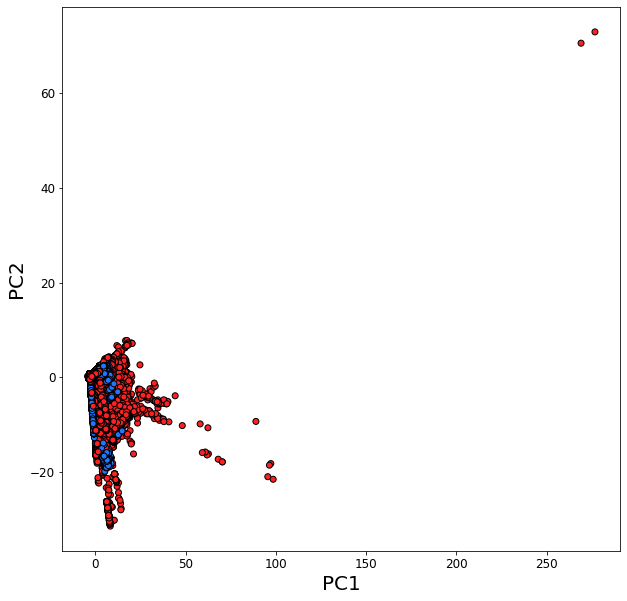

In [ ]:
#imports
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#Scale the data
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

#Obtain principal components
pca = PCA().fit(scaled)

pc = pca.transform(scaled)
pc1 = pc[:,0]
pc2 = pc[:,1]

#Plot principal components
plt.figure(figsize=(10,10))

colour = ['#ff2121' if y == 0 else '#2176ff' for y in data['Label']]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
plt.ylabel("Glucose",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

#KNN

In [ ]:
data = dfnew.drop(['index','Unnamed: 0','level_0'], axis=1)

In [ ]:
data

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3389,6,5206015,9,11,1213,1948,661,0,134.777778,209.079995,1173,0,177.090909,347.937194,607.182269,3.841710,2.740008e+05,4.873823e+05,1906221,54,5206015,650751.9,1.367797e+06,4024698,186,5043065,5.043065e+05,5.916400e+05,1906221,46378,0,0,0,0,192,244,1.728770,2.112941,0,1173,150.523810,282.220768,79648.561905,0,0,1,1,0,0,0,1,158.05000,134.77777,177.09091,0,0,0,0,0,0,9,1213,11,1948,8192,62872,6,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1
1,443,6,60991608,14,14,1211,3396,875,0,86.500000,235.073066,1460,0,242.571429,520.660485,75.534982,0.459080,2.258948e+06,4.218116e+06,10009249,1,60991608,4691662.0,5.173112e+06,10077768,265,60922977,4.686383e+06,5.195334e+06,10080219,1,0,0,0,0,292,364,0.229540,0.229540,0,1460,158.862069,398.172318,158541.194581,0,0,0,1,0,0,0,0,164.53572,86.50000,242.57143,0,0,0,0,0,0,14,1211,14,3396,8192,117,9,20,1.165047e+05,1.174018e+05,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,1
2,53,17,27292,1,1,45,163,45,45,45.000000,0.000000,163,163,163.000000,0.000000,7621.280961,73.281548,2.729200e+04,0.000000e+00,27292,27292,0,0.0,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,8,8,36.640774,36.640774,45,163,84.333333,68.127332,4641.333333,0,0,0,0,0,0,0,0,126.50000,45.00000,163.00000,0,0,0,0,0,0,1,45,1,163,-1,-1,0,8,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1
3,443,6,70343424,17,20,1118,5653,258,0,65.764706,88.989837,1430,0,282.650000,445.753682,96.256332,0.525991,1.953984e+06,9.874980e+06,58654921,8,70343424,4396464.0,1.474216e+07,58790474,142,70195940,3.694523e+06,1.354913e+07,58750691,13,0,0,0,0,352,412,0.241671,0.284319,0,1430,178.184211,343.542661,118021.559744,0,0,0,1,0,0,0,0,183.00000,65.76471,282.65000,0,0,0,0,0,0,17,1118,20,5653,8192,184,9,20,5.276835e+05,3.863115e+05,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,1
4,53,17,137267,2,2,94,214,47,47,47.000000,0.000000,107,107,107.000000,0.000000,2243.802225,29.140289,4.575567e+04,4.240885e+04,84190,259,137008,137008.0,0.000000e+00,137008,137008,84449,8.444900e+04,0.000000e+00,84449,84449,0,0,0,0,16,16,14.570144,14.570144,47,107,71.000000,32.863353,1080.000000,0,0,0,0,0,0,0,0,88.75000,47.00000,107.00000,0,0,0,0,0,0,2,94,2,214,-1,-1,1,8,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531324,80,6,99999918,2,2,16,0,8,8,8.000000,0.000000,0,0,0.000000,0.000000,0.160000,0.040000,3.333331e+07,5.773497e+07,99999902,2,99999916,99999920.0,0.000000e+00,99999916,99999916,99999904,9.999990e+07,0.000000e+00,99999904,99999904,1,0,0,0,64,64,0.020000,0.020000,0,8,4.800000,4.381780,19.200000,0,1,0,0,1,0,0,0,6.00000,8.00000,0.00000,0,0,0,0,0,0

In [ ]:
X=data.drop(['Label'], axis=1)
y=data['Label']

In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
 
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)


0.997749053322593


In [ ]:
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)

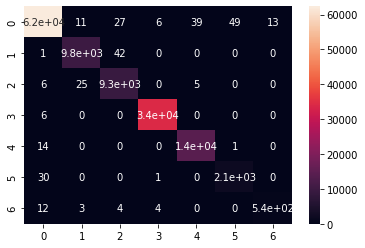

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
X=data[['Init Fwd Win Byts','Dst Port','Fwd Seg Size Min','ACK Flag Cnt','Flow Pkts/s','Bwd Pkts/s','Init Bwd Win Byts','Fwd Pkts/s','RST Flag Cnt','PSH Flag Cnt','ECE Flag Cnt','URG Flag Cnt','Bwd Seg Size Avg','Bwd Pkt Len Max','Bwd Pkt Len Std','Fwd IAT Min','Protocol','Pkt Len Max','Fwd Pkt Len Max','Flow Duration','Label']]

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(X, hue="Label", height=3);
plt.show()

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='la', size=5) \
.map(plt.scatter, “sepal_length”, “sepal_width”) \
.add_legend();
plt.show()